# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

In [3]:
# Read the data into a dataframe and name feature columns and the class column

df = pd.read_csv('spamTrain1.csv', header=None)
df.columns = [f'feature_{i+1}' for i in range(len(df.columns)-1)] + ['class']
feature_df = df.iloc[:, :-1]

In [4]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,class
0,0.00,0.000,0.0,0.0014,0.0,0.0,0.0000,0.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0029,1
1,0.00,0.000,0.0,0.0031,-1.0,0.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0031,0.0094,1
2,0.00,-1.000,0.0,0.0045,-1.0,0.0,0.0000,0.0159,0.0,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0,0.0102,0.0011,1
3,0.00,0.005,0.0,-1.0000,0.0,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0,0.0000,0.0133,1
4,0.01,0.000,0.0,0.0000,0.0,-1.0,0.0125,0.0000,0.0,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0,0.0000,0.0000,0


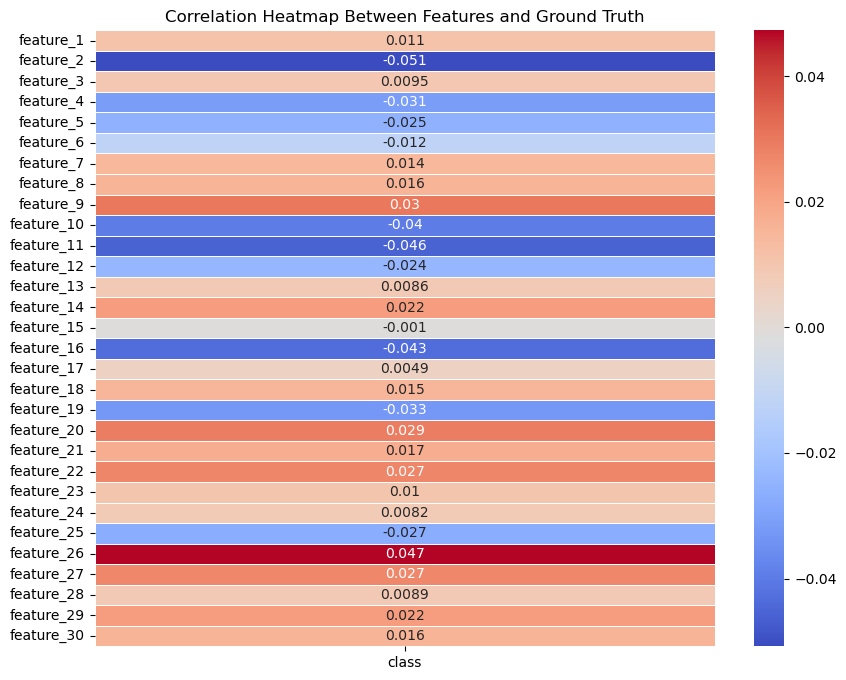

In [5]:
# Create a heatmap of correlations between class and the features.
corr_matrix = df.corr()['class'].drop('class').to_frame()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap Between Features and Ground Truth')
plt.show()

In [18]:
# Create a table to understand each feature a bit more for imputation.
class_0_df = df[df['class'] == 0].iloc[:, :-1]
class_1_df = df[df['class'] == 1].iloc[:, :-1]

missing_count = (feature_df == -1).sum()

mean_0 = class_0_df.mean()
mean_1 = class_1_df.mean()

std_dev_0 = class_0_df.std()
std_dev_1 = class_1_df.std()

feature_data_df = pd.DataFrame({
    'missing_count': missing_count,
    'mean_0': mean_0,
    'mean_1': mean_1,
    'std_dev_0': std_dev_0,
    'std_dev_1': std_dev_1
})

feature_data_df['mean_diff'] = feature_data_df['mean_0'] - feature_data_df['mean_1']
feature_data_df['std_dev_diff'] = feature_data_df['std_dev_0'] - feature_data_df['std_dev_1']

feature_data_df

,missing_count,mean_0,mean_1,std_dev_0,std_dev_1,mean_diff,std_dev_diff
feature_1,282,-0.190845,-0.181904,0.395036,0.386157,-0.008941,0.008879
feature_2,272,-0.164044,-0.203810,0.371778,0.404033,0.039766,-0.032255
feature_3,302,-0.204119,-0.196409,0.404114,0.397662,-0.007709,0.006452
feature_4,313,-0.195500,-0.221383,0.398498,0.420452,0.025883,-0.021953
feature_5,306,-0.194205,-0.214813,0.396239,0.414212,0.020608,-0.017973
feature_6,289,-0.187922,-0.197565,0.392116,0.399126,0.009644,-0.007010
feature_7,289,-0.196467,-0.184872,0.399439,0.388915,-0.011596,0.010525
feature_8,292,-0.198065,-0.185430,0.400074,0.392840,-0.012636,0.007234
feature_9,300,-0.209243,-0.184533,0.407107,0.391179,-0.024710,0.015928
feature_10,305,-0.187997,-0.220784,0.393776,0.416861,0.032788,-0.023085


In [27]:
# Looking missing & zero values for imputation options.

total_zeros = (feature_df == 0).sum().sum()
total_non_zeros = (feature_df > 0).sum().sum()
total_missing_values = (feature_df == -1).sum().sum()


print(total_zeros)
print(total_non_zeros)
print(total_missing_values)

print(total_non_zeros/(total_zeros + total_non_zeros))

29486
6517
8997
0.18101269338666223


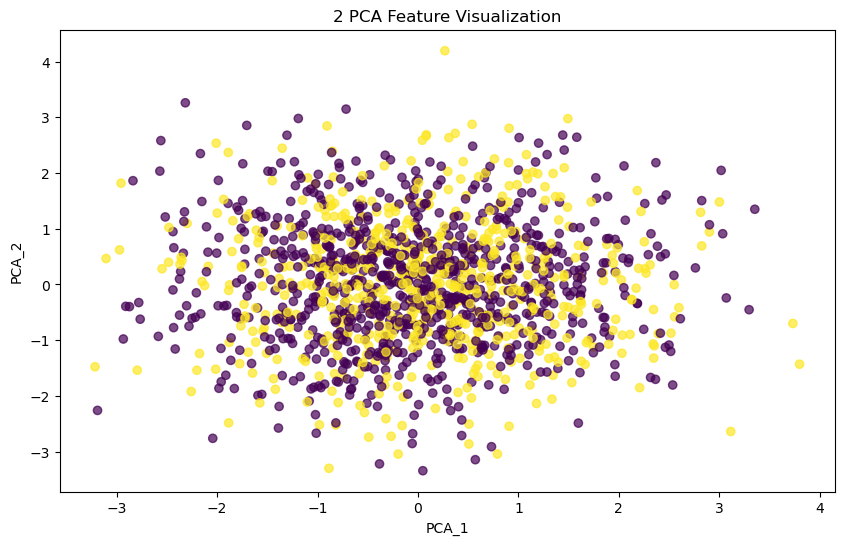

In [7]:
# Try to visualize the data with 2 dim pca
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA_1', 'PCA_2'])
pca_df['class'] = df['class']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA_1'], pca_df['PCA_2'], 
                          c=pca_df['class'], alpha=0.7)

plt.title('2 PCA Feature Visualization')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

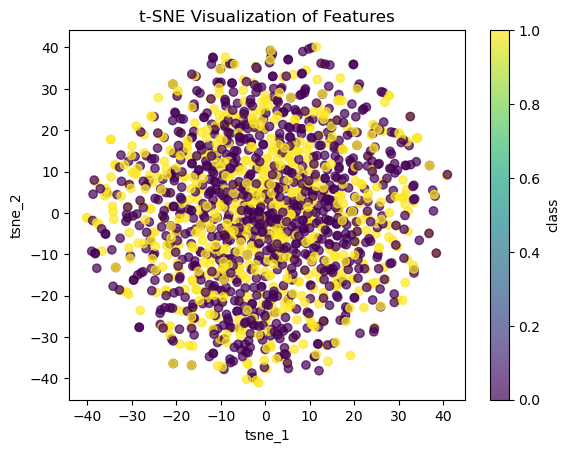

In [8]:
# Try visualizing with t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_df)

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['class'] = df['class']

scatter = plt.scatter(tsne_df['tsne_1'], tsne_df['tsne_2'], 
                        c=tsne_df['class'], alpha=0.7)
plt.colorbar(scatter, label='class')

plt.title('t-SNE Visualization of Features')
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
plt.show()

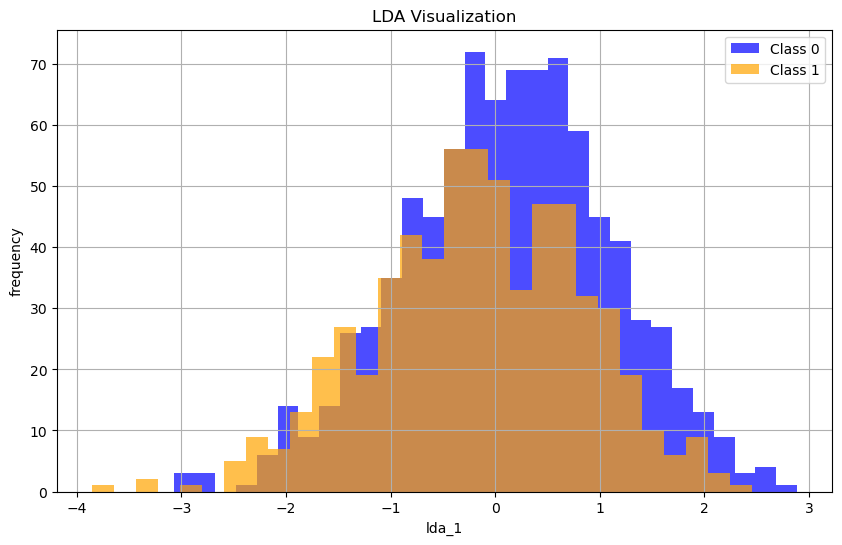

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_df)

lda = LDA(n_components=1)  # Reduce to 2 dimensions for visualization (can use n_components=1 for 1D)
X_lda = lda.fit_transform(X_scaled, df['class'])
lda_df = pd.DataFrame(data=X_lda, columns=['lda_1'])

plt.figure(figsize=(10, 6))

class_0 = lda_df[df['class'] == 0]['lda_1']
class_1 = lda_df[df['class'] == 1]['lda_1']

plt.hist(class_0, bins=30, alpha=0.7, label='Class 0', color='blue')
plt.hist(class_1, bins=30, alpha=0.7, label='Class 1', color='orange')

# Add labels and title
plt.title('LDA Visualization')
plt.xlabel('lda_1')
plt.ylabel('frequency')
plt.legend()

plt.grid()
plt.show()